### Using the basic preprocessing module of `s2spy`

To start we need to import the `preprocess` module, and load in some example data:


In [1]:
import xarray as xr
from s2spy import preprocess
import matplotlib.pyplot as plt

file_path = '../tests/test_rgdr/test_data'
data = xr.open_dataset(f'{file_path}/sst_daily_1979-2018_5deg_Pacific_175_240E_25_50N.nc')
data

<xarray.Dataset>
Dimensions:    (time: 14600, latitude: 5, longitude: 13)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-12-31
  * latitude   (latitude) float64 47.5 42.5 37.5 32.5 27.5
  * longitude  (longitude) float64 177.5 182.5 187.5 192.5 ... 227.5 232.5 237.5
Data variables:
    sst        (time, latitude, longitude) float64 ...

The preprocessor is instatiated with the basic settings, the size of the rolling window, the detrending method, and if climatology should be removed from the data.

In [2]:
preprocessor = preprocess.Preprocessor(
    rolling_window_size=25,
    detrend="linear",
    remove_climatology=True,
)

The preprocesssor can be fit to data, which changes the object in place:

In [3]:
preprocessor.fit(data)

In [4]:
preprocessor.trend

{'slope': <xarray.Dataset>
 Dimensions:    (latitude: 5, longitude: 13)
 Coordinates:
   * latitude   (latitude) float64 47.5 42.5 37.5 32.5 27.5
   * longitude  (longitude) float64 177.5 182.5 187.5 192.5 ... 227.5 232.5 237.5
 Data variables:
     sst        (latitude, longitude) float64 5.809e-19 5.919e-19 ... 2.049e-19,
 'intercept': <xarray.Dataset>
 Dimensions:    (latitude: 5, longitude: 13)
 Coordinates:
   * latitude   (latitude) float64 47.5 42.5 37.5 32.5 27.5
   * longitude  (longitude) float64 177.5 182.5 187.5 192.5 ... 227.5 232.5 237.5
 Data variables:
     sst        (latitude, longitude) float64 279.2 279.5 279.8 ... 292.5 292.1}

Now the climatology and trend will be stored in `preprocessor`. 

In the example case the climatology of one location is stored as follows:

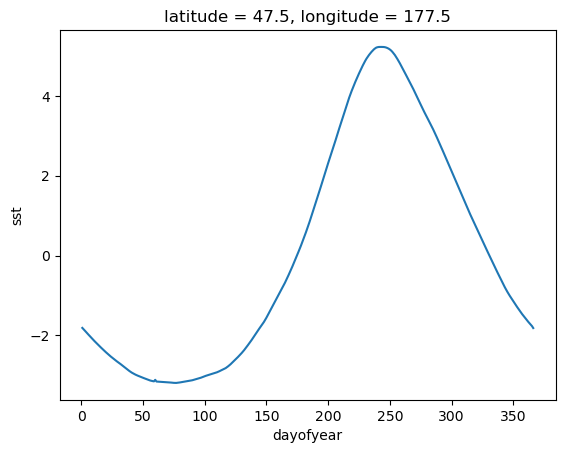

In [5]:
preprocessor.climatology["sst"].isel(latitude=0, longitude=0).plot()

The trend has multiple components, depending on the method. The "linear" method has a slope and an intercept.

The example data has already been detrended, so its slope is (basically) 0:

In [6]:
preprocessor.trend["slope"].sst.isel(latitude=0, longitude=0).values

array(5.80857645e-19)

To apply the detrending and climatology removal to a dataset, the `transform` method is used:

In [7]:
preprocessed_data = preprocessor.transform(data)

Text(0.5, 1.0, 'Detrended and climatology removed')

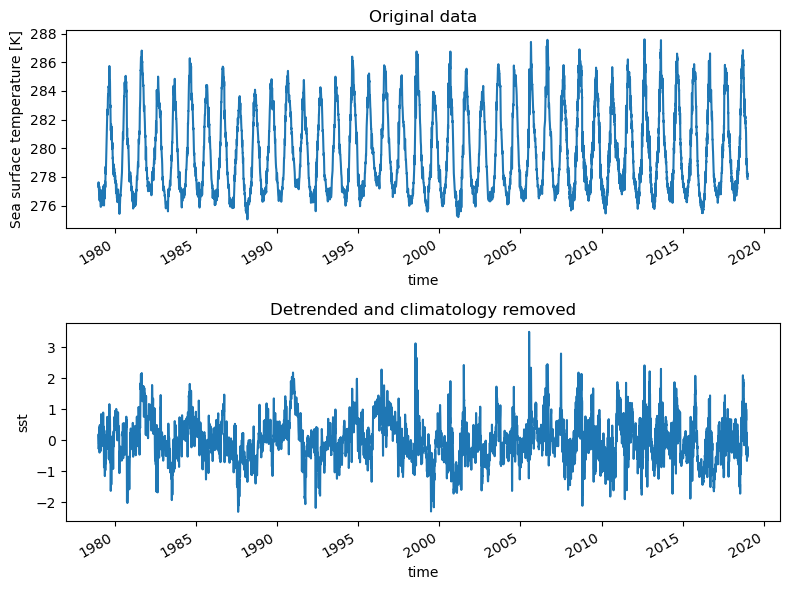

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 6))
data.sst.isel(latitude=0, longitude=0).plot(ax=ax1)
preprocessed_data.sst.isel(latitude=0, longitude=0).plot(ax=ax2)
fig.tight_layout()
ax1.set_title("Original data")
ax2.set_title("Detrended and climatology removed")

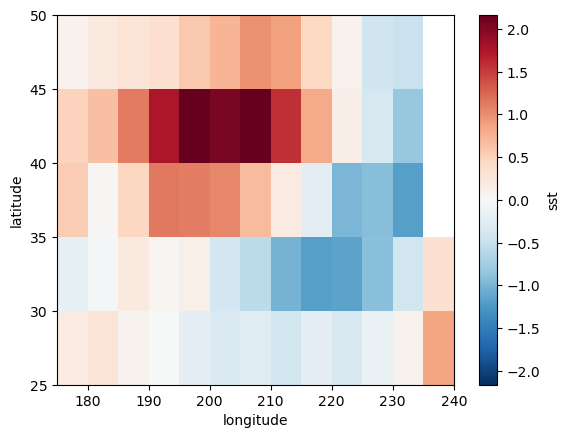

In [9]:
preprocessed_data.sst.sel(time=slice("1980-08-01", "1980-08-31")).mean(dim="time").plot()
